# **Practico Mentoria - Analisis Exploratorio y Curación de Datos**

Se propone la elaboración de un informe o presentación, en formato estatico:
* PDF
* Markdowns
* Google Docs

Que responda a las cuestiones solicitadas en cada seccion de esta **Jupyter Notebook**.

La comunicación debe estar apuntada a un público técnico pero sin conocimiento del tema particular, como por ejemplo, sus compañeros de clase.  
Por lo cual debe estar redactado de forma consisa y comprensible.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


in_colab = 'google.colab' in sys.modules
if 'ftfy' not in sys.modules:
    !pip install 'ftfy<5.6'

import ftfy.badness as bad

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
filename = "https://raw.githubusercontent.com/diplodatos2020/Introduccion_Mentoria/master/dataset_inf_telec_ayc.csv"
df = pd.read_csv(filename)
df.shape

(19680, 12)

In [3]:
df.sample(5)

,ID EQUIPO,PUNTO MEDICION,CAPACIDAD MAXIMA [GBS],FECHA INICIO MEDICION,FECHA HORA,FECHA FIN MEDICION,PASO,LATENCIA [MS],% PACK LOSS,INBOUND [BITS],OUTBOUND [BITS],MEDIDA
11333,24,EDC - Coral State,1.0,2020-06-04 17:00:00.000,2020-06-09 15:00:00.000,2020-06-21 19:00:00.000,7200.0,2.94194,0.00000,1.041085e+02,5.376650e+03,MB
8107,31,RDB - RIO,10.0,2020-06-04 17:00:00.000,2020-06-14 03:00:00.000,2020-06-21 19:00:00.000,7200.0,6.62670,0.00000,1.682295e+08,2.134682e+09,GB
19294,23,Yocsina - Carlos Paz,10.0,2020-06-04 17:00:00.000,2020-06-06 19:00:00.000,2020-06-21 19:00:00.000,7200.0,3.99758,0.00000,1.699315e+08,3.139368e+09,GB
6080,4,NOC - SW Clientes 1,1.0,2020-06-04 17:00:00.000,2020-06-16 01:00:00.000,2020-06-21 19:00:00.000,7200.0,1.49577,0.10793,9.197450e+06,5.143087e+07,MB
19092,23,Yocsina - Alta Gracia,10.0,2020-06-04 17:00:00.000,2020-06-07 01:00:00.000,2020-06-21 19:00:00.000,7200.0,2.04048,0.00000,8.798032e+07,1.131484e+09,GB


---

## **1. Importacion de los datos**

---

### 1.1  Elija algun `PUNTO MEDICION` y calcule el rango que existe en la feature `FECHA HORA`.

Por ejemplo, el `PUNTO MEDICION` **ABA - Abasto Cliente**

In [4]:
df_abasto = df[df['PUNTO MEDICION'] == "ABA - Abasto Cliente"]
df_abasto

,ID EQUIPO,PUNTO MEDICION,CAPACIDAD MAXIMA [GBS],FECHA INICIO MEDICION,FECHA HORA,FECHA FIN MEDICION,PASO,LATENCIA [MS],% PACK LOSS,INBOUND [BITS],OUTBOUND [BITS],MEDIDA
0,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00.000,2020-06-04 19:00:00.000,2020-06-21 19:00:00.000,7200.0,0.68187,0.0,8.633895e+06,1.331665e+07,MB
1,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00.000,2020-06-04 21:00:00.000,2020-06-21 19:00:00.000,7200.0,NaN,0.0,4.255482e+06,NaN,MB
2,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00.000,2020-06-04 23:00:00.000,2020-06-21 19:00:00.000,7200.0,0.74235,0.0,3.867232e+06,1.133068e+07,MB
3,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00.000,2020-06-05 01:00:00.000,2020-06-21 19:00:00.000,7200.0,0.71120,0.0,4.675312e+06,1.051718e+07,MB
4,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00.000,2020-06-05 03:00:00.000,2020-06-21 19:00:00.000,7200.0,0.66982,0.0,1.022260e+06,6.956942e+06,MB
...,...,...,...,...,...,...,...,...,...,...,...,...
10040,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00.000,2020-06-21 11:00:00.000,2020-06-21 19:00:00.000,7200.0,0.73542,0.0,6.222864e+05,4.285840e+06,MB
10041,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00.000,2020-06-21 13:00:00.000,2020-06-21 19:00:00.000,7200.0,0.63056,0.0,1.735184e+06,3.517757e+06,MB
10042,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00.000,2020-06-21 15:00:00.000,2020-06-21 19:00:00.000,7200.0,0.67150,0.0,6.683322e+05,3.896005e+06,MB
10043,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00.000,2020-06-21 17:00:00.000,2020-06-21 19:00:00.000,7200.0,0.82509,0.0,7.536948e+05,4.046018e+06,MB


 ```python
df_abasto['FECHA HORA'].max() - df_abasto['FECHA HORA'].min()


---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-5-32d849aea896> in <module>
----> 1 df_abasto['FECHA HORA'].max() - df_abasto['FECHA HORA'].min()

TypeError: unsupported operand type(s) for -: 'str' and 'str'
 ```
 
 
 
 **NOTA** La feature `FECHA_HORA` no tiene el tipo de dato correcto (posee el typo `str`) , por lo tanto al levantar los datos del archivo debemos indicar que parsee las fechas para que las pueda tomar en el formato correcto (typo 
 `datetime`)
 
 Indiquemos que la columna date es una fecha como indica la [documentación](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#datetime-handling).

In [5]:
df = pd.read_csv(
    filename,
    parse_dates=["FECHA INICIO MEDICION","FECHA HORA","FECHA FIN MEDICION"])

In [6]:
df.dtypes

ID EQUIPO                          int64
PUNTO MEDICION                    object
CAPACIDAD MAXIMA [GBS]           float64
FECHA INICIO MEDICION     datetime64[ns]
FECHA HORA                datetime64[ns]
FECHA FIN MEDICION        datetime64[ns]
PASO                             float64
LATENCIA [MS]                    float64
% PACK LOSS                      float64
INBOUND [BITS]                   float64
OUTBOUND [BITS]                  float64
MEDIDA                            object
dtype: object

In [7]:
df_abasto = df[df['PUNTO MEDICION'] == "ABA - Abasto Cliente"]
df_abasto['FECHA HORA'].max() - df_abasto['FECHA HORA'].min()

Timedelta('17 days 00:00:00')

## **2. Etiquetas de variables/columnas: no usar caracteres especiales**

Chequear que no haya caracteres fuera de a-Z, 0-9 y _ en los nombres de columnas del Dataframe.

---  

### 2.1 Columnas

En primer lugar se procede a verificar si los nombres de las columnas no posaen caracteres no reconocidos, producto de usar lenguajes o codificaciones distintas (`Mojibake`).

In [8]:
def weird(val):
  if isinstance(val, float): 
    return 0
  return bad.sequence_weirdness(val)

In [9]:
weirdness = pd.DataFrame()
weirdness = weirdness.assign(name=df.columns.values)
weirdness['name_weirdness'] = weirdness.name.apply(weird)
weirdness

,name,name_weirdness
0,ID EQUIPO,0
1,PUNTO MEDICION,0
2,CAPACIDAD MAXIMA [GBS],0
3,FECHA INICIO MEDICION,0
4,FECHA HORA,0
5,FECHA FIN MEDICION,0
6,PASO,0
7,LATENCIA [MS],0
8,% PACK LOSS,0
9,INBOUND [BITS],0


 **NOTA** Las etiquetas de las columnas no contienen caracteres no reconocidos pero si contienen caracteres especiales por lo tanto deben ser modificadas

In [10]:
# nombre a minusculas
df.columns = df.columns.str.lower()
# eliminado de espacios de borde 
df.columns = df.columns.str.strip()
# reemplazo de espacios por "_"
df.columns = df.columns.str.replace(' ', '_')
# elimnar caracter % 
df.columns = df.columns.str.replace('%_', 'porcentaje_')
# eliminar strings que tengan el patron [ y ] usando exp regulares
df.columns = df.columns.str.replace('(\[|\])', '', regex=True)
df.sample(2)

,id_equipo,punto_medicion,capacidad_maxima_gbs,fecha_inicio_medicion,fecha_hora,fecha_fin_medicion,paso,latencia_ms,porcentaje_pack_loss,inbound_bits,outbound_bits,medida
5597,4,NOC - Pilar,1.0,2020-06-04 17:00:00,2020-06-09 23:00:00,2020-06-21 19:00:00,7200.0,3.08759,0.00000,1.322167e+06,2.746597e+06,MB
879,30,Carlos Paz - Cosquin,1.0,2020-06-04 17:00:00,2020-06-09 17:00:00,2020-06-21 19:00:00,7200.0,3.07448,0.11341,5.655413e+07,5.967458e+08,MB


### 2.2 Variable `punto_medicion`

Como la unica variable del tipo `string` es `punto_medicion` se debe verificar si posee caracteres no reconocidos (`Mojibake`). 

In [11]:
masure_weird = df[['punto_medicion']].drop_duplicates().reset_index(drop=True)
masure_weird['name_weirdness'] = masure_weird.punto_medicion.apply(weird)
masure_weird

,punto_medicion,name_weirdness
0,ABA - Abasto Cliente,0
1,ABA - Temple,0
2,BAZ - Carlos Paz,0
3,BAZ - Yocsina,0
4,Carlos Paz - Cosquin,0
5,Carlos Paz - La Falda,0
6,EDC - Capitalinas,0
7,EDC - Coral State,0
8,EDC - ET Oeste,0
9,EDC - MOP,0


**NOTA** Los valores de la columna PUNTO_MEDICION no contienen caracteres no reconocidos (Mojibake)

## **3. Agregar nuevas caracteristicas**

---

### 3.1  columnas `INBOUND` y `OUTBOUND`

Agregar al Dataframe dos nuevas columnas `INBOUND` y `OUTBOUND` que seran las columnas `INBOUND_BITS` y `OUTBOUND_BITS` llevadas a la unidad especificada en la columna `MEDIDA`.

In [12]:

df['inbound'] = df.apply(
    lambda row: row.loc['inbound_bits'] / 1e9 if row.loc['medida'] == 'GB' else row.loc['inbound_bits'] / 1e6,
    axis=1
)
df['outbound'] = df.apply(
    lambda row: row.loc['outbound_bits'] / 1e9 if row.loc['medida'] == 'GB' else row.loc['outbound_bits'] / 1e6,
    axis=1
)

df

,id_equipo,punto_medicion,capacidad_maxima_gbs,fecha_inicio_medicion,fecha_hora,fecha_fin_medicion,paso,latencia_ms,porcentaje_pack_loss,inbound_bits,outbound_bits,medida,inbound,outbound
0,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00,2020-06-04 19:00:00,2020-06-21 19:00:00,7200.0,0.68187,0.00000,8.633895e+06,1.331665e+07,MB,8.633895,13.316648
1,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00,2020-06-04 21:00:00,2020-06-21 19:00:00,7200.0,NaN,0.00000,4.255482e+06,NaN,MB,4.255482,NaN
2,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00,2020-06-04 23:00:00,2020-06-21 19:00:00,7200.0,0.74235,0.00000,3.867232e+06,1.133068e+07,MB,3.867232,11.330677
3,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00,2020-06-05 01:00:00,2020-06-21 19:00:00,7200.0,0.71120,0.00000,4.675312e+06,1.051718e+07,MB,4.675312,10.517184
4,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00,2020-06-05 03:00:00,2020-06-21 19:00:00,7200.0,0.66982,0.00000,1.022260e+06,6.956942e+06,MB,1.022260,6.956942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19675,23,Yocsina - Mogote,10.0,2020-06-04 17:00:00,2020-06-21 11:00:00,2020-06-21 19:00:00,7200.0,2.19038,0.05019,2.420419e+08,3.554864e+08,GB,0.242042,0.355486
19676,23,Yocsina - Mogote,10.0,2020-06-04 17:00:00,2020-06-21 13:00:00,2020-06-21 19:00:00,7200.0,3.49093,0.00000,2.475581e+08,3.799669e+08,GB,0.247558,0.379967
19677,23,Yocsina - Mogote,10.0,2020-06-04 17:00:00,2020-06-21 15:00:00,2020-06-21 19:00:00,7200.0,3.06947,0.00000,2.544276e+08,3.550098e+08,GB,0.254428,0.355010
19678,23,Yocsina - Mogote,10.0,2020-06-04 17:00:00,2020-06-21 17:00:00,2020-06-21 19:00:00,7200.0,2.12655,0.00000,2.481285e+08,3.604063e+08,GB,0.248128,0.360406


## **4. Tratar valores faltantes**

---

Veamos cuantos valores nulos tenemos:

In [13]:
df_missing_values_count = df.isnull().sum()

df_missing_values_count[df_missing_values_count > 0]

paso                    1175
latencia_ms             1195
porcentaje_pack_loss    1176
inbound_bits            1200
outbound_bits           1211
inbound                 1200
outbound                1211
dtype: int64

In [14]:
from IPython.display import display_html

# Buscamos en que puntos de medicion están los nulos 
ds_latencia_ms = df[pd.isnull(df['latencia_ms'])][['punto_medicion','id_equipo']].groupby('punto_medicion').agg(['count'])
ds_outbound = df[pd.isnull(df['outbound'])][['punto_medicion','id_equipo']].groupby('punto_medicion').agg(['count'])
ds_inbound = df[pd.isnull(df['inbound'])][['punto_medicion','id_equipo']].groupby('punto_medicion').agg(['count'])
ds_porcentaje_pack_loss = df[pd.isnull(df['porcentaje_pack_loss'])][['punto_medicion','id_equipo']].groupby('punto_medicion').agg(['count'])

ds_latencia_ms_styler = ds_latencia_ms.style.set_table_attributes("style='display:inline;padding-left:20px;'").set_caption('latencia_ms NULOS')
ds_outbound_styler = ds_outbound.style.set_table_attributes("style='display:inline;'").set_caption('outbound NULOS')
ds_inbound_styler = ds_inbound.style.set_table_attributes("style='display:inline;'").set_caption('inbound NULOS')
ds_porcentaje_pack_loss_styler = ds_porcentaje_pack_loss.style.set_table_attributes("style='display:inline;'").set_caption('porcentaje_pack_loss NULOS')
display_html(ds_latencia_ms_styler._repr_html_()+ds_porcentaje_pack_loss_styler._repr_html_(), raw=True)
display_html(ds_outbound_styler._repr_html_()+ds_inbound_styler._repr_html_(), raw=True)

,id_equipo
,count
punto_medicion,
ABA - Abasto Cliente,26
ABA - Temple,25
BAZ - Carlos Paz,24
BAZ - Yocsina,19
Carlos Paz - Cosquin,20
Carlos Paz - La Falda,32
EDC - Capitalinas,25
EDC - Coral State,19


,id_equipo
,count
punto_medicion,
ABA - Abasto Cliente,26
ABA - Temple,28
BAZ - Carlos Paz,27
BAZ - Yocsina,24
Carlos Paz - Cosquin,25
Carlos Paz - La Falda,27
EDC - Capitalinas,25
EDC - Coral State,23


In [15]:
#Porcentaje de valores no nulos en la feature latencia_ms
len(df.dropna(subset=['latencia_ms']))/len(df)

0.9392784552845529

In [16]:
#Porcentaje de valores no nulos en la feature porcentaje_pack_loss
len(df.dropna(subset=['porcentaje_pack_loss']))/len(df)

0.9402439024390243

In [17]:
#Porcentaje de valores no nulos en la feature inbound
len(df.dropna(subset=['inbound']))/len(df)

0.9390243902439024

In [18]:
#Porcentaje de valores no nulos en la feature outbound
len(df.dropna(subset=['outbound']))/len(df)

0.9384654471544716

In [19]:
# Verificamos si los valores nulos pertenecen al mismo registro
# Generamosun nuevo dataset sin valores nulos
df_notna = df[pd.notnull(df['porcentaje_pack_loss'])]
print('latencia_ms ', df_notna.latencia_ms.isnull().sum())
print('porcentaje_pack_loss ', df_notna.porcentaje_pack_loss.isnull().sum())
print('outbound ', df_notna.outbound.isnull().sum())
print('inbound ', df_notna.inbound.isnull().sum())
# Cantidad de registros del nuevo dataset
df_notna.shape

latencia_ms  612
porcentaje_pack_loss  0
outbound  632
inbound  610


(18504, 14)

**NOTA:**  
Podemos ver que si eliminamos los registros donde el feature sea **porcentaje_pack_loss** es nulo, aun nos quedan valores nan para las variables latencia_ms, outbound e inbound 

Algunas tecnicas para tratar los missing values:

**Eliminar** muestras o variables que tienen datos faltantes.
**Imputar** los valores perdidos, es decir, sustituirlos por estimaciones por ejemplo la media, la moda ó usando KNN.

A) Analizar si es conveniente **Eliminar** las muestras o variables con datos faltantes del Dataframe.  
B) Aplicar la **Imputacion** usando la media o moda sobre las columnas con missing values del Dataframe.

**Hint**:
* Para la imputacion usando la media, moda ver el siguiente link:  
  https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

###4.1 ¿Eliminar los missing values? Justificar

**NOTA**  La variable **paso** no la tenemos en cuenta para el análisis de los 
valores faltantes ya que no le hemos descubierto utilidad alguna hasta el 
momento. Entonces se elimina.

In [20]:
df_clean = df.drop(columns=['paso'])
df_missing_values_count = df_clean.isnull().sum()

df_missing_values_count[df_missing_values_count > 0]

latencia_ms             1195
porcentaje_pack_loss    1176
inbound_bits            1200
outbound_bits           1211
inbound                 1200
outbound                1211
dtype: int64

Para el resto de las variables decidimos **NO** eliminar los valores nulos y de
 acuerdo a la naturaleza de la variable reemplazar el valor por una estimación

###4.2 Imputacion usando Media y Moda



####**porcentaje_pack_loss**

Analizar con que valor realizar la imputacion de la feature **porcentaje_pack_loss**

In [21]:
res = df_clean[['porcentaje_pack_loss']].agg(
    ['count', 'median', 'mean','std', 'max', 'min']
    )
res.loc['mode'] = df_clean.porcentaje_pack_loss.mode()[0]
res

,porcentaje_pack_loss
count,18504.000000
median,0.000000
mean,0.203675
std,0.926476
max,41.522270
min,0.000000
mode,0.000000


In [22]:
points = ['ABA - Temple', 
          'BAZ - Carlos Paz', 
          'EDC - NOR', 
          'NOC - 6720HI to BAZ',
          'NOC - 6720HI to N20-1']

<ipython-input-23-f6afc5374092>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['hora'] = df['fecha_hora'].dt.hour


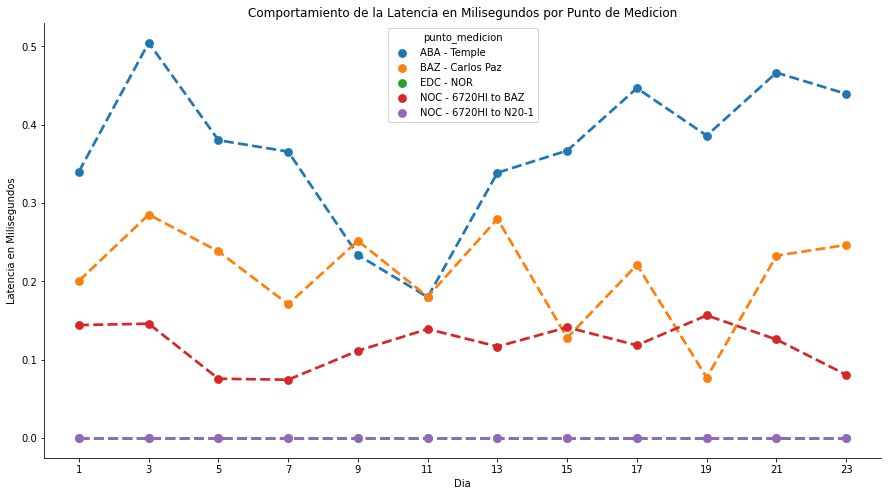

In [23]:
df_select = df_clean[df_clean.punto_medicion.isin(points)]
df_select['hora'] = df['fecha_hora'].dt.hour

plt.figure(figsize=(15,8))
sns.pointplot(
    data=df_select, x='hora', y='porcentaje_pack_loss', hue='punto_medicion', 
    estimator=np.mean, ci=None, linestyles='--', markers='o')

# plt.xticks(rotation=45)
plt.xlabel('Dia')
plt.ylabel('Latencia en Milisegundos')
plt.title('Comportamiento de la Latencia en Milisegundos por Punto de Medicion')
sns.despine()
plt.show()

No encontramos diferencias en el comportamiento de esta variable con respecto al dataset total o analizando por punto de medición. Por lo tanto decidimos aplicar el mismo criterio de imputación a todo el dataset. Verificamos que porcentaje de valores iguales a 0 (cero) tiene la variable con
respecto al total

In [24]:
len(df_clean[df_clean.porcentaje_pack_loss == 0]) / len(df_clean)

0.6120426829268293

**NOTA** 
Reemplazamos los valores Nan de la variable porcentaje_pack_loss por cero ya que representa la mediana de la variable y el 61% del dataset tiene dicho valor

In [25]:
df_clean.fillna({'porcentaje_pack_loss': 0}, inplace=True)
df_clean.head()

,id_equipo,punto_medicion,capacidad_maxima_gbs,fecha_inicio_medicion,fecha_hora,fecha_fin_medicion,latencia_ms,porcentaje_pack_loss,inbound_bits,outbound_bits,medida,inbound,outbound
0,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00,2020-06-04 19:00:00,2020-06-21 19:00:00,0.68187,0.0,8.633895e+06,1.331665e+07,MB,8.633895,13.316648
1,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00,2020-06-04 21:00:00,2020-06-21 19:00:00,NaN,0.0,4.255482e+06,NaN,MB,4.255482,NaN
2,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00,2020-06-04 23:00:00,2020-06-21 19:00:00,0.74235,0.0,3.867232e+06,1.133068e+07,MB,3.867232,11.330677
3,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00,2020-06-05 01:00:00,2020-06-21 19:00:00,0.71120,0.0,4.675312e+06,1.051718e+07,MB,4.675312,10.517184
4,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00,2020-06-05 03:00:00,2020-06-21 19:00:00,0.66982,0.0,1.022260e+06,6.956942e+06,MB,1.022260,6.956942


#### **latencia_ms**
Analizar con que valor realizar la imputacion de la feature **latencia_ms**

In [26]:
res = df_clean[['latencia_ms']].agg(
    ['count', 'median', 'mean','std', 'max', 'min']
    )
res.loc['mode'] = df_clean.latencia_ms.mode()[0]
res

,latencia_ms
count,18485.000000
median,2.031490
mean,2.816634
std,2.132946
max,27.051760
min,0.250300
mode,1.472510


**NOTA**  

De acuerdo a la tabla anterior se puede observar que la media y la mediana
difieren en 0.8 aproximadamente, ademas al tener una desviacion de 2.13 deducimos que existe  
una gran dispersion de los valores.

Entonces se realiza un analisis por punto de medicion usando la mediana. 

<ipython-input-27-370dfd574b02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['hora'] = df['fecha_hora'].dt.hour


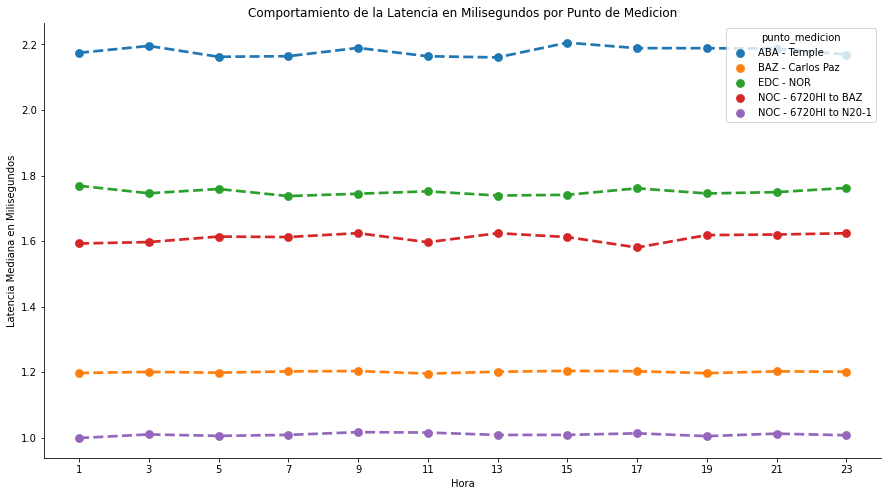

In [27]:
df_select = df_clean[df_clean.punto_medicion.isin(points)]
df_select['hora'] = df['fecha_hora'].dt.hour

plt.figure(figsize=(15,8))
sns.pointplot(
    data=df_select, x='hora', y='latencia_ms', hue='punto_medicion', 
    estimator=np.median, ci=None, linestyles='--', markers='o')


plt.xlabel('Hora')
plt.ylabel('Latencia Mediana en Milisegundos')
plt.title('Comportamiento de la Latencia en Milisegundos por Punto de Medicion')
sns.despine()
plt.show()

**NOTA**  

En el grafico anterior se puede observar que las latencias varian segun los 
puntos de medición, por cada punto de medicion graficamos las variaciones de 
las latencias por hora. Usando como estimador la mediana para evitar la influencia 
de valores outliers.

Se toma la decisión que la mejor opción es usar la mediana  para reemplazar los valores faltantes, obteniendo la misma por punto de medición.

In [28]:
# obtencion de medianas por punto de medicion
cols=['punto_medicion', 'latencia_ms']
medians = df_clean[cols].groupby(
    'punto_medicion'
    ).median().to_dict()['latencia_ms']

In [29]:
#dfclean = df_clean.copy()

print("Cantidad de nulos inciales {}".format(
    df_clean.latencia_ms.isnull().sum()))

for index, row in df_clean.iterrows():
  if np.isnan(row.loc['latencia_ms']):
    df_clean.loc[index, 'latencia_ms'] = medians[row.loc['punto_medicion']]
  # end if
# end for

print("Cantidad de nulos post imputacion {}".format(
    df_clean.latencia_ms.isnull().sum()))

Cantidad de nulos inciales 1195
Cantidad de nulos post imputacion 0


In [30]:
df_clean.isnull().sum()

id_equipo                   0
punto_medicion              0
capacidad_maxima_gbs        0
fecha_inicio_medicion       0
fecha_hora                  0
fecha_fin_medicion          0
latencia_ms                 0
porcentaje_pack_loss        0
inbound_bits             1200
outbound_bits            1211
medida                      0
inbound                  1200
outbound                 1211
dtype: int64


#### **inbound**

Analizar con que valor realizar la imputacion de la feature **inbound**

In [31]:
res = df_clean[['inbound_bits']].agg(
    ['count', 'median', 'mean','std', 'max', 'min']
    )
res.loc['mode'] = df_clean.inbound.mode()[0]
res

,inbound_bits
count,1.848000e+04
median,1.482903e+07
mean,6.503149e+08
std,2.381072e+09
max,2.418785e+10
min,1.018562e+02
mode,1.042089e-04


Vemos que a nivel general existe una gran variabilidad entre las diferentes 
medidas, como hemos descubierto por los análisis previos que los 
comportamientos dependen del punto de medición, realizaremos el análisis previo 
por punto de medicion y por hora.

In [32]:
cols = ['punto_medicion', 'hora', 'inbound_bits']
df_select[cols].groupby(['punto_medicion', 'hora']).agg(
    ['mean', 'median'])

inbound_bits              
                                    mean        median
punto_medicion        hora                            
ABA - Temple          1     3.666764e+08  3.684544e+08
                      3     2.606769e+08  2.480528e+08
                      5     2.431327e+08  2.363934e+08
                      7     1.853722e+08  1.851712e+08
                      9     1.692429e+08  1.793599e+08
                      11    2.670525e+08  2.791858e+08
                      13    3.040658e+08  3.032738e+08
                      15    3.284424e+08  3.365798e+08
                      17    3.342053e+08  3.434987e+08
                      19    3.495913e+08  3.504389e+08
                      21    4.311013e+08  4.371447e+08
                      23    4.192066e+08  4.272949e+08
BAZ - Carlos Paz      1     5.278901e+09  5.319437e+09
                      3     3.207718e+09  3.145810e+09
                      5     1.596100e+09  1.563000e+09
                      7     9.974431e+08  9.692109e+08
                      9     1.324892e+09  1.304944e+09
                      11    2.672391e+09  2.642357e+09
                      13    3.386143e+09  3.423938e+09
                      15    3.713199e+09  3.693522e+09
                      17    4.009064e+09  4.040690e+09
                      19    4.192027e+09  4.161922e+09
                      21    5.147330e+09  5.168495e+09
                      23    5.494603e+09  5.537923e+09
EDC - NOR             1     4.547137e+08  4.516081e+08
                      3     3.391533e+08  3.259406e+08
                      5     3.254491e+08  3.124066e+08
                      7     2.493530e+08  2.488398e+08
                      9     2.273348e+08  2.450700e+08
                      11    3.457455e+08  3.770070e+08
                      13    3.962078e+08  4.072834e+08
                      15    4.181270e+08  4.311003e+08
                      17    4.334434e+08  4.523412e+08
                      19    4.474597e+08  4.536509e+08
                      21    5.342723e+08  5.363706e+08
                      23    5.070722e+08  5.175146e+08
NOC - 6720HI to BAZ   1     1.278824e+09  1.280786e+09
                      3     1.018052e+09  1.002606e+09
                      5     8.878880e+08  8.860792e+08
                      7     7.097918e+08  7.115459e+08
                      9     6.705013e+08  6.803131e+08
                      11    9.753287e+08  1.013733e+09
                      13    1.150526e+09  1.187320e+09
                      15    1.155557e+09  1.176106e+09
                      17    1.210035e+09  1.258429e+09
                      19    1.281556e+09  1.287628e+09
                      21    1.458178e+09  1.487002e+09
                      23    1.381626e+09  1.396485e+09
NOC - 6720HI to N20-1 1     2.213208e+10  2.219471e+10
                      3     1.434025e+10  1.425806e+10
                      5     7.447372e+09  7.407120e+09
                      7     4.690950e+09  4.613549e+09
                      9     5.939432e+09  5.850574e+09
                      11    1.122697e+10  1.106923e+10
                      13    1.429062e+10  1.430670e+10
                      15    1.590427e+10  1.607109e+10
                      17    1.735585e+10  1.758268e+10
                      19    1.769291e+10  1.757256e+10
                      21    2.084221e+10  2.061393e+10
                      23    2.253981e+10  2.247939e+10

**NOTA** 
Podemos verificar que para cada punto de medición la media y la mediana en la mayoría de los casos son similares, por lo tanto reemplazaremos la feature **outbound** con la mediana correspondientes a su punto de medicion, tal como se muestra en el tabla anterior.

<ipython-input-33-3e0289e6f814>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['hora'] = df_select['fecha_hora'].dt.hour


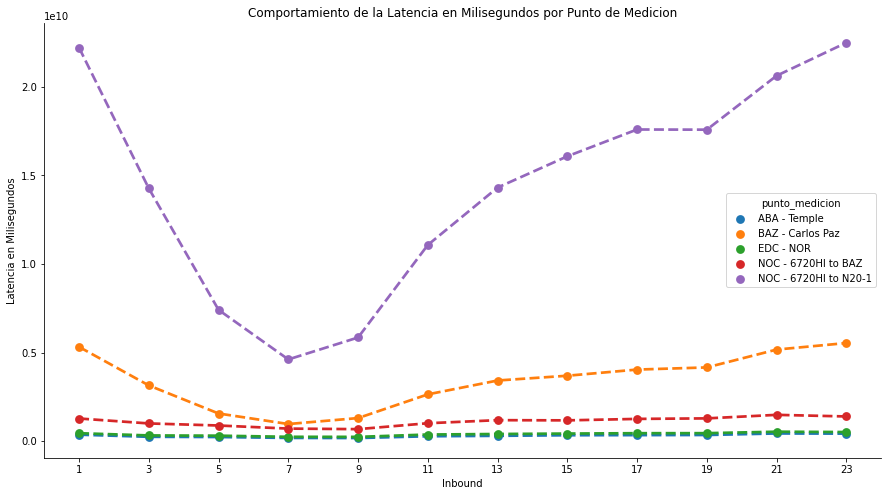

In [33]:
df_select = df_clean[df_clean.punto_medicion.isin(points)]
df_select['hora'] = df_select['fecha_hora'].dt.hour

plt.figure(figsize=(15,8))
sns.pointplot(
    data=df_select, x='hora', y='inbound_bits', hue='punto_medicion', 
    estimator=np.median, ci=None, linestyles='--', markers='o')

plt.xlabel('Inbound')
plt.ylabel('Latencia en Milisegundos')
plt.title('Comportamiento de la Latencia en Milisegundos por Punto de Medicion')
sns.despine()
plt.show()

**NOTA** 
Se procede a realizar la imputacion usando la mediana por punto de medicion y 
hora

In [34]:
df_clean['hora'] = df_clean['fecha_hora'].dt.hour

cols = ['punto_medicion', 'hora', 'inbound_bits']
medians = df_clean[cols].groupby(
    ['punto_medicion', 'hora']
    ).median().to_dict()['inbound_bits']

In [35]:
print("Cantidad de nulos inciales {}".format(
    df_clean.inbound_bits.isnull().sum()))

# data_select es igual data_clean con la columna hora 
for index, row in df_clean.iterrows():
  if np.isnan(row.loc['inbound_bits']):
    id = (row.loc['punto_medicion'], row.loc['hora'])
    df_clean.loc[index, 'inbound_bits'] = medians[id]
  # end if
# end for

print("Cantidad de nulos post imputacion {}".format(
    df_clean.inbound_bits.isnull().sum()))

Cantidad de nulos inciales 1200
Cantidad de nulos post imputacion 0


In [36]:
df_clean.isnull().sum()

id_equipo                   0
punto_medicion              0
capacidad_maxima_gbs        0
fecha_inicio_medicion       0
fecha_hora                  0
fecha_fin_medicion          0
latencia_ms                 0
porcentaje_pack_loss        0
inbound_bits                0
outbound_bits            1211
medida                      0
inbound                  1200
outbound                 1211
hora                        0
dtype: int64

#### **outbound**

Analizar con que valor realizar la imputacion de la feature 

Suponemos que la variable outbound sigue la misma logica que la variable inbound. Por lo tanto se replica el analisis. 

<ipython-input-37-1d89bc2f38c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['hora'] = df_clean['fecha_hora'].dt.hour


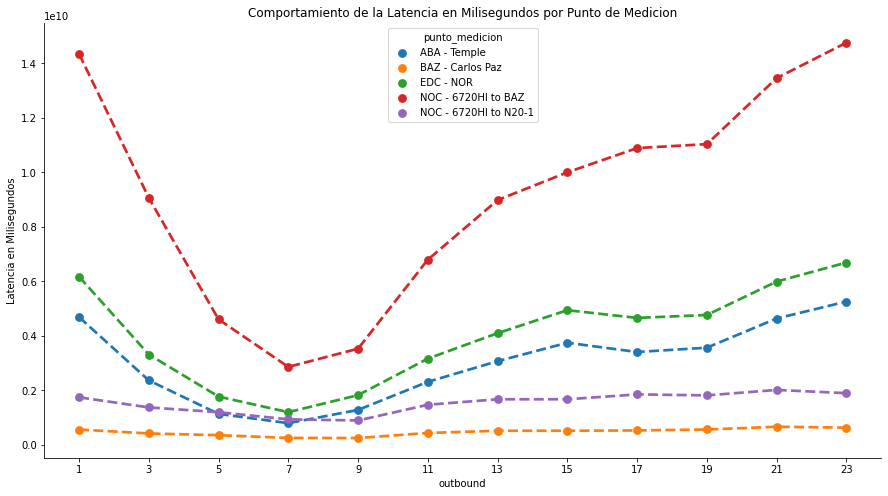

In [37]:
df_select = df_clean[df_clean.punto_medicion.isin(points)]
df_select['hora'] = df_clean['fecha_hora'].dt.hour

plt.figure(figsize=(15,8))
sns.pointplot(
    data=df_select, x='hora', y='outbound_bits', hue='punto_medicion', 
    estimator=np.median, ci=None, linestyles='--', markers='o')

plt.xlabel('outbound')
plt.ylabel('Latencia en Milisegundos')
plt.title('Comportamiento de la Latencia en Milisegundos por Punto de Medicion')
sns.despine()
plt.show()

In [38]:
cols = ['punto_medicion', 'hora', 'outbound_bits']
medians = df_clean[cols].groupby(
    ['punto_medicion', 'hora']
    ).median().to_dict()['outbound_bits']

In [39]:
print("Cantidad de nulos inciales {}".format(
    df_clean.outbound_bits.isnull().sum()))

# data_select es igual data_clean con la columna hora 
for index, row in df_clean.iterrows():
  if np.isnan(row.loc['outbound_bits']):
    id = (row.loc['punto_medicion'], row.loc['hora'])
    df_clean.loc[index, 'outbound_bits'] = medians[id]
  # end if
# end for

print("Cantidad de nulos post imputacion {}".format(
    df_clean.outbound_bits.isnull().sum()))

Cantidad de nulos inciales 1211
Cantidad de nulos post imputacion 0


In [40]:
df_clean.isnull().sum()

id_equipo                   0
punto_medicion              0
capacidad_maxima_gbs        0
fecha_inicio_medicion       0
fecha_hora                  0
fecha_fin_medicion          0
latencia_ms                 0
porcentaje_pack_loss        0
inbound_bits                0
outbound_bits               0
medida                      0
inbound                  1200
outbound                 1211
hora                        0
dtype: int64

#### Features agregadas

Se recalcula nuevamente para las features agregadas 

TODO: solo para los valores nulls

In [41]:
df_clean['inbound'] = df_clean.apply(
    lambda row: row.loc['inbound_bits'] / 1e9 if row.loc['medida'] == 'GB' else row.loc['inbound_bits'] / 1e6,
    axis=1
)
df_clean['outbound'] = df_clean.apply(
    lambda row: row.loc['outbound_bits'] / 1e9 if row.loc['medida'] == 'GB' else row.loc['outbound_bits'] / 1e6,
    axis=1
)
df_clean.isnull().sum()

id_equipo                0
punto_medicion           0
capacidad_maxima_gbs     0
fecha_inicio_medicion    0
fecha_hora               0
fecha_fin_medicion       0
latencia_ms              0
porcentaje_pack_loss     0
inbound_bits             0
outbound_bits            0
medida                   0
inbound                  0
outbound                 0
hora                     0
dtype: int64

## **6. Codificar variables**

---

> Las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas.

Codificar la variable `PUNTO MEDICION` del Dataframe.

In [42]:
from sklearn import preprocessing

In [43]:
df_clean.describe(include=['O'])

,punto_medicion,medida
count,19680,19680
unique,48,2
top,RDB - Escuela de Capacitacion,MB
freq,410,11890


In [44]:
column='punto_medicion'
# Create a label (punto_medicion) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(df_clean[column])

LabelEncoder()

In [45]:
# View encoder mapping
dict(zip(le.classes_,le.transform(le.classes_)))

{'ABA - Abasto Cliente': 0,
 'ABA - Temple': 1,
 'BAZ - Carlos Paz': 2,
 'BAZ - Yocsina': 3,
 'Carlos Paz - Cosquin': 4,
 'Carlos Paz - La Falda': 5,
 'EDC - Capitalinas': 6,
 'EDC - Coral State': 7,
 'EDC - ET Oeste': 8,
 'EDC - MOP': 9,
 'EDC - NOR': 10,
 'EDC - RDB': 11,
 'EDC - Telecomunicacioes': 12,
 'EDC - Transporte': 13,
 'JM - Totoral Nueva': 14,
 'JM - Totoral Vieja': 15,
 'NOC - 6720HI to BAZ': 16,
 'NOC - 6720HI to EDC': 17,
 'NOC - 6720HI to ETC': 18,
 'NOC - 6720HI to N20-1': 19,
 'NOC - 6720HI to R4 Silica': 20,
 'NOC - 6720HI to RPrivado': 21,
 'NOC - ACHALA - Servicios': 22,
 'NOC - ACHALA - Solo Dolores': 23,
 'NOC - Almacenes': 24,
 'NOC - ET Sur': 25,
 'NOC - Interfabricas': 26,
 'NOC - Pilar': 27,
 'NOC - S9306 to SS6720HI': 28,
 'NOC - SW Clientes 1': 29,
 'NOC - SW Clientes 2': 30,
 'NOC - Switch Servers': 31,
 'NOC - UTN': 32,
 'RDB - ET Don Bosco - San Roque': 33,
 'RDB - ET La Calera': 34,
 'RDB - Escuela de Capacitacion': 35,
 'RDB - GZU': 36,
 'RDB - JM': 3

In [46]:
#Conviene hacerlo en otro dataframe, por lo tanto hacemos backup del dataframe original
df_clean_bkp = df_clean
df_clean_bkp.head()

,id_equipo,punto_medicion,capacidad_maxima_gbs,fecha_inicio_medicion,fecha_hora,fecha_fin_medicion,latencia_ms,porcentaje_pack_loss,inbound_bits,outbound_bits,medida,inbound,outbound,hora
0,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00,2020-06-04 19:00:00,2020-06-21 19:00:00,0.68187,0.0,8.633895e+06,1.331665e+07,MB,8.633895,13.316648,19
1,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00,2020-06-04 21:00:00,2020-06-21 19:00:00,0.68589,0.0,4.255482e+06,8.293801e+06,MB,4.255482,8.293801,21
2,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00,2020-06-04 23:00:00,2020-06-21 19:00:00,0.74235,0.0,3.867232e+06,1.133068e+07,MB,3.867232,11.330677,23
3,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00,2020-06-05 01:00:00,2020-06-21 19:00:00,0.71120,0.0,4.675312e+06,1.051718e+07,MB,4.675312,10.517184,1
4,25,ABA - Abasto Cliente,1.0,2020-06-04 17:00:00,2020-06-05 03:00:00,2020-06-21 19:00:00,0.66982,0.0,1.022260e+06,6.956942e+06,MB,1.022260,6.956942,3


In [47]:
# Apply the fitted encoder to the pandas column
df_clean[column] = le.transform(df_clean[column]) 
df_clean.head()

,id_equipo,punto_medicion,capacidad_maxima_gbs,fecha_inicio_medicion,fecha_hora,fecha_fin_medicion,latencia_ms,porcentaje_pack_loss,inbound_bits,outbound_bits,medida,inbound,outbound,hora
0,25,0,1.0,2020-06-04 17:00:00,2020-06-04 19:00:00,2020-06-21 19:00:00,0.68187,0.0,8.633895e+06,1.331665e+07,MB,8.633895,13.316648,19
1,25,0,1.0,2020-06-04 17:00:00,2020-06-04 21:00:00,2020-06-21 19:00:00,0.68589,0.0,4.255482e+06,8.293801e+06,MB,4.255482,8.293801,21
2,25,0,1.0,2020-06-04 17:00:00,2020-06-04 23:00:00,2020-06-21 19:00:00,0.74235,0.0,3.867232e+06,1.133068e+07,MB,3.867232,11.330677,23
3,25,0,1.0,2020-06-04 17:00:00,2020-06-05 01:00:00,2020-06-21 19:00:00,0.71120,0.0,4.675312e+06,1.051718e+07,MB,4.675312,10.517184,1
4,25,0,1.0,2020-06-04 17:00:00,2020-06-05 03:00:00,2020-06-21 19:00:00,0.66982,0.0,1.022260e+06,6.956942e+06,MB,1.022260,6.956942,3


In [48]:
df_clean.punto_medicion.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,
       33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

**NOTA** 
En este punto codificamos la feature PUNTO_MEDICION con valores numericos que van desde el 0 al 4. Además creamos un backup del dataframe original por más que rapidamente se pueda volver atras dicha codificación

More about preprocessing in:
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

## **Apendix**
---

In [49]:
### 2.2  columnas `src` y `dst`
df[['src', 'dst']] = df['punto_medicion'].str.rsplit(' - ', n=1, expand=True)
df[['src', 'dst']]

,src,dst
0,ABA,Abasto Cliente
1,ABA,Abasto Cliente
2,ABA,Abasto Cliente
3,ABA,Abasto Cliente
4,ABA,Abasto Cliente
...,...,...
19675,Yocsina,Mogote
19676,Yocsina,Mogote
19677,Yocsina,Mogote
19678,Yocsina,Mogote


**NOTA** 
Agregamos dos columnas src y dst (Origen y Distribución) que se derivan de la 
feature PUNTO_MEDCIONM, detectamos que pueden ser útiles en el dataset a la 
hora de aplicar un modelo de aprendizaje automático

### Evaluar cómo comprimir los datos
para su almacenamiento más eficiente.

En la actualidad, en las nubes el almacenamiento no suele ser problema sino la 
velocidad para leerlo que suele ser determinante a la hora de determinar el 
formato de almacenamiento.

El formato preferido es feather por la velocidad de carga acorde a este post 
Pero no tiene soporte para python 3.8+, el segundo formato es `pickle`

In [50]:
df_clean

,id_equipo,punto_medicion,capacidad_maxima_gbs,fecha_inicio_medicion,fecha_hora,fecha_fin_medicion,latencia_ms,porcentaje_pack_loss,inbound_bits,outbound_bits,medida,inbound,outbound,hora
0,25,0,1.0,2020-06-04 17:00:00,2020-06-04 19:00:00,2020-06-21 19:00:00,0.68187,0.00000,8.633895e+06,1.331665e+07,MB,8.633895,13.316648,19
1,25,0,1.0,2020-06-04 17:00:00,2020-06-04 21:00:00,2020-06-21 19:00:00,0.68589,0.00000,4.255482e+06,8.293801e+06,MB,4.255482,8.293801,21
2,25,0,1.0,2020-06-04 17:00:00,2020-06-04 23:00:00,2020-06-21 19:00:00,0.74235,0.00000,3.867232e+06,1.133068e+07,MB,3.867232,11.330677,23
3,25,0,1.0,2020-06-04 17:00:00,2020-06-05 01:00:00,2020-06-21 19:00:00,0.71120,0.00000,4.675312e+06,1.051718e+07,MB,4.675312,10.517184,1
4,25,0,1.0,2020-06-04 17:00:00,2020-06-05 03:00:00,2020-06-21 19:00:00,0.66982,0.00000,1.022260e+06,6.956942e+06,MB,1.022260,6.956942,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19675,23,47,10.0,2020-06-04 17:00:00,2020-06-21 11:00:00,2020-06-21 19:00:00,2.19038,0.05019,2.420419e+08,3.554864e+08,GB,0.242042,0.355486,11
19676,23,47,10.0,2020-06-04 17:00:00,2020-06-21 13:00:00,2020-06-21 19:00:00,3.49093,0.00000,2.475581e+08,3.799669e+08,GB,0.247558,0.379967,13
19677,23,47,10.0,2020-06-04 17:00:00,2020-06-21 15:00:00,2020-06-21 19:00:00,3.06947,0.00000,2.544276e+08,3.550098e+08,GB,0.254428,0.355010,15
19678,23,47,10.0,2020-06-04 17:00:00,2020-06-21 17:00:00,2020-06-21 19:00:00,2.12655,0.00000,2.481285e+08,3.604063e+08,GB,0.248128,0.360406,17


In [51]:
df_clean.to_pickle('./output/01-dataset_inf_telec_ayc_clean.pickle')